# Biểu đồ tròn, biểu đồ hộp, biểu đồ phân tán và biểu đồ bong bóng

Thời lượng ước tính: **30** phút

## Mục tiêu

Sau khi hoàn thành lab này, bạn sẽ có thể:

*   Khám phá thêm về thư viện Matplotlib
*   Tạo biểu đồ tròn, biểu đồ hộp, biểu đồ phân tán và biểu đồ bong bóng


## Mục lục

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Khám phá tập dữ liệu với *pandas*](#0)<br>
2.  [Download và chuẩn bị dữ liệu](#2)<br>
3.  [Trực quan hóa dữ liệu với Matplotlib](#4) <br>
4.  [Biểu đồ tròn](#6) <br>
5.  [Biểu đồ hộp](#8) <br>
6.  [Biểu đồ phân tán](#10) <br>
7.  [Biểu đồ bong bóng](#12) <br>

</div>


# Khám phá tập dữ liệu với *pandas* và Matplotlib<a id="0"></a>

Bộ công cụ: Khóa học phần lớn dùng [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) và [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) cho việc dọn dẹp, phân tích và trực quan hóa dữ liệu. Thư viện vẽ biểu đồ chính mà chúng ta sẽ khám phá là [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Tập dữ liệu: Nhập cư tới Canada từ 1980 tới 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) từ trang web của Liên Hợp Quốc.

Tập dữ liệu chứa dữ liệu hàng năm về dòng người di cư quốc tế được ghi lại bởi các quốc gia điểm đến. Dữ liệu thể hiện cả dòng vào và dòng ra theo nơi sinh, quốc tịch hoặc nơi cư trú trước đây / tiếp theo của cả người nước ngoài và người mang quốc tịch. Trong bài học này, chúng ta sẽ tập trung vào dữ liệu Nhập cư Canada.


# Download và chuẩn bị dữ liệu <a id="2"></a>


Import mô-đun chính.


In [ ]:
import numpy as np  # hữu ích với nhiều tính toán khoa học trong Python
import pandas as pd # thư viện cấu trúc dữ liệu chính

Hãy download và import tập dữ liệu Canadian Immigration chính của chúng tôi bằng phương thức _pandas_ `read_excel()`. Thông thường, chúng ta sẽ cần download một mô-đun _pandas_ yêu cầu đọc trong file excel trước khi có thể làm điều đó. Mô-đun này là **xlrd**. Để thuận tiện cho bạn, chúng tôi đã cài đặt sẵn mô-đun này, vì vậy bạn sẽ không phải lo lắng về điều đó. Nếu không, bạn sẽ cần chạy dòng code sau để cài đặt mô-đun **xlrd**:

```
!conda install -c anaconda xlrd --yes
```


Download tập dữ liệu và đọc nó thành dataframe *pandas*.


In [ ]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Hãy xem 5 mục đầu của tập dữ liệu.


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Hãy xem có bao nhiêu mục nhập trong tập dữ liệu.

In [ ]:
# in ra các kích thước của dataframe
print(df_can.shape)

(195, 43)


Dọn dẹp dữ liệu. Chúng ta sẽ thực hiện một số sửa đổi với tập dữ liệu gốc để giúp việc tạo hình ảnh trực quan dễ dàng hơn. Tham khảo lab *Introduction to Matplotlib and Line Plots* và *Area Plots, Histograms, and Bar Plots* để xem mô tả chi tiết về tiền xử lý này.

In [ ]:
# dọn dẹp tập dữ liệu để loại bỏ các cột không cần thiết (chẳng hạn: REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# đặt lại tên các cột để dễ hiểu hơn
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# để thống nhất, hãy để tất cả các cột kiểu string
df_can.columns = list(map(str, df_can.columns))

# đặt tên quốc gia làm chỉ mục - hữu ích khi tra cứu nhanh các quốc gia bằng phương thức .loc 
df_can.set_index('Country', inplace=True)

# thêm cột total
df_can['Total'] = df_can.sum(axis=1)

# years mà chúng ta sẽ dừng trong bài này - sẽ hữu ích cho vẽ biểu đồ sau đó
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


# Trực quan hóa dữ liệu với Matplotlib<a id="4"></a>


Import `Matplotlib`.


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # tùy chọn: style ggplot

# kiểm tra phiên bản mới nhất của Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


# Biểu đồ tròn <a id="6"></a>

`Biểu đồ tròn` là một đồ họa hình tròn hiển thị tỷ lệ số bằng cách chia hình tròn thành các phần theo tỷ lệ. Có thể bạn đã quen thuộc với biểu đồ tròn vì nó được sử dụng rộng rãi trong kinh doanh và truyền thông. Chúng ta có thể tạo biểu đồ tròn trong Matplotlib bằng cách truyền từ khóa `kind=pie` vào.

Hãy sử dụng biểu đồ tròn để tìm hiểu tỷ lệ (%) của những người nhập cư mới được nhóm theo lục địa trong khoảng thời gian từ 1980 đến 2013.


Bước 1: Thu thập dữ liệu. 

Chúng ta sẽ sử dụng phương thức _pandas_ `groupby` để tóm tắt dữ liệu nhập cư theo `Continent`. Quy trình chung của `groupby` gồm các bước sau:

1.  **Split:** Chia dữ liệu thành các nhóm dựa trên một số tiêu chí.
2.  **Apply:** Áp dụng một hàm cho từng nhóm cách độc lập:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3.  **Combine:** Kết hợp các kết quả thành một cấu trúc dữ liệu.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">


In [ ]:
# nhóm các quốc gia theo lục địa và áp dụng hàm sum() 
df_continents = df_can.groupby('Continent', axis=0).sum()

# lưu ý: kết quả của phương thức groupby là một đối tượng `groupby'. 
# chúng ta không thể sử dụng nó thêm cho tới khi vận dụng một hàm (chẳng han: .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Bước 2: Vẽ biểu đồ dữ liệu. Chúng ta sẽ truyền vào từ khóa `kind='pie'` cùng với các tham số bổ sung sau:

-   `autopct` -  là một string hoặc hàm được sử dụng để gắn nhãn các wedget với giá trị số của chúng. Nhãn sẽ được đặt bên trong wedget. Nếu đó là định dạng string, nhãn sẽ là `fmt%pct`.
-   `startangle` - xoay phần bắt đầu của biểu đồ tròn theo độ góc ngược chiều kim đồng hồ so với trục x.
-   `shadow` - Vẽ bóng bên dưới biểu đồ tròn (để tạo cảm giác 3D).


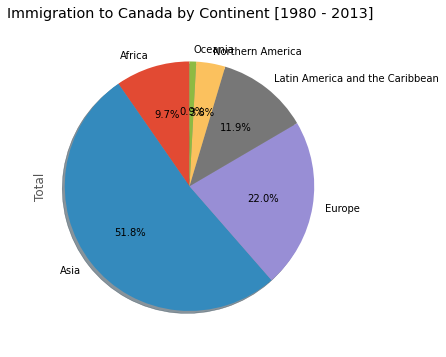

In [ ]:
# autopct tạo %, bắt đầu góc thể hiện điểm khởi đầu 
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # thêm %
                            startangle=90,     # bắt đầu góc 90° (Africa)
                            shadow=True,       # thêm bóng      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # thiết lập biểu đồ tròn để giống hình tròn 

plt.show()

Hình ảnh trên không được rõ ràng lắm, trong một số trường hợp, số và văn bản trùng lặp. Hãy thực hiện một số sửa đổi để cải thiện hình ảnh:

-   Xóa các nhãn văn bản trên biểu đồ tròn bằng cách chuyển vào `legend` và thêm nó dưới dạng chú giải riêng biệt bằng `plt.legend()`.
-   Đẩy tỷ lệ phần trăm nằm ngay bên ngoài biểu đồ tròn bằng cách chuyển vào tham số `pctdistance`.
-   Chuyển một tập màu tùy chỉnh cho các lục địa bằng cách chuyển vào tham số `color`.
-   **Explode** biểu đồ tròn để nhấn mạnh 3 lục địa thấp nhất (Châu Phi, Bắc Mỹ và Mỹ Latinh và Carribbean) bằng cách truyền vào tham số `explode`.


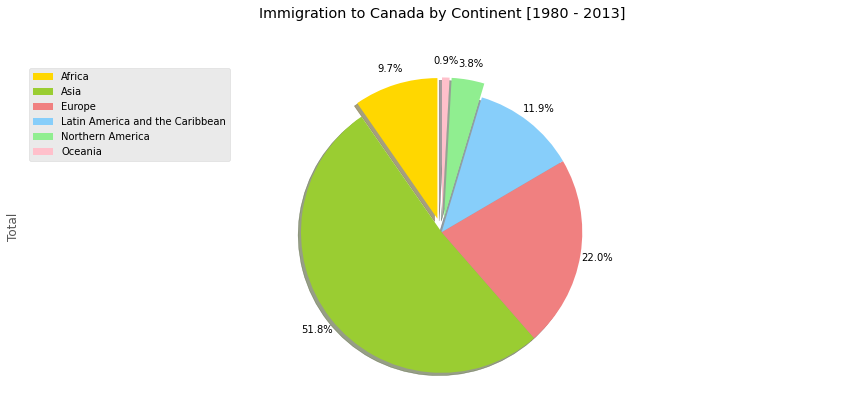

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # tỷ lệ cho mỗi lục địa để bù đắp mỗi wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # tắt các nhãn trên biểu đồ tròn
                            pctdistance=1.12,    # tỷ lệ giữa tâm của mỗi lát biểu đồ và phần đầu của văn bản được tạo bởi autopct 
                            colors=colors_list,  # thêm màu tùy chỉnh
                            explode=explode_list # 'explode' 3 lục địa thấp nhất
                            )

# mở rộng tiêu đề lên 12% để khớp với pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# thêm legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()


**Câu hỏi:** Hãy tìm hiểu tỷ lệ (%) dân nhập cư mới theo các lục địa trong năm 2013 qua biểu đồ tròn.

**Lưu ý**: Bạn có thể thử với các giá trị để sửa bất kỳ giá trị lát chồng chéo nào.

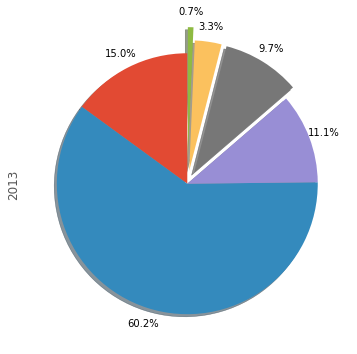

In [ ]:
### nhập đáp án của bạn ở đây

explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # tỷ lệ cho mỗi lục địa để bù đắp mỗi wedge.
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # tắt các nhãn trên biểu đồ tròn
                            pctdistance=1.12,            # tỷ lệ giữa tâm của mỗi lát biểu đồ và phần đầu của nhãn văn bản
                            explode=explode_list         # 'explode' 3 lục địa thấp nhất
                            )


<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

    df_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )

    # scale the title up by 12% to match pctdistance
    plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
    plt.axis('equal') 

    # add legend
    plt.legend(labels=df_continents.index, loc='upper left') 

    # show plot
    plt.show()

```

</details>


# Biểu đồ hộp <a id="8"></a>

`Biểu đồ hộp` là một cách biểu diễn _phân phối_ của dữ liệu thông qua 5 thứ nguyên chính:

-   **Minimum (Cực tiểu):** Số nhỏ nhất trong tập dữ liệu không bao gồm các ngoại lệ.
- **First quartile (Phần tư thứ nhất):** Số chính giữa giá trị `minimum` và `median`.
- **Second quartile (Median):** Số chính giữa của tập dữ liệu (đã sắp xếp).
- **Third quartile (Phần tư thứ ba):** Số chính giữa `median` và `maximum`.
- **Maximum (Cực đại):** Số cao nhất trong tập dữ liệu không bao gồm các giá trị ngoại lệ.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width=440, align="center">


Để tạo một `biểu đồ hộp`, chúng ta có thể sử dụng `kind=box` trong phương thức `plot` được gọi trên chuỗi hoặc dataframe _pandas_ .

Hãy vẽ biểu đồ hộp cho những người nhập cư Nhật Bản trong giai đoạn 1980-2013.


Bước 1: Lấy tập dữ liệu. Mặc dù chỉ trích xuất dữ liệu cho một quốc gia, chúng ta vẫn sẽ lấy dữ liệu đó dưới dạng dataframe. Điều này sẽ giúp chúng ta gọi phương thức `dataframe.describe()` để xem các phân vị.


In [ ]:
# lấy một dataframe, đặt thêm dấu ngoặc vuông quanh 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Bước 2: Vẽ biểu đồ bằng cách truyền vào `kind='box'`.


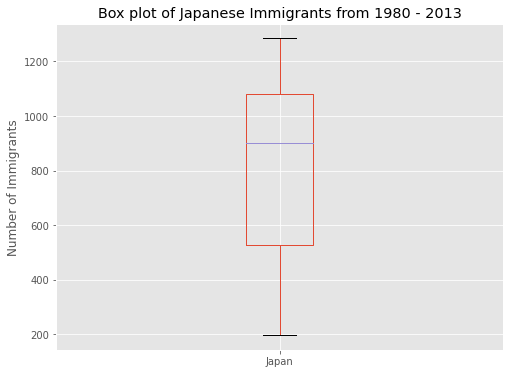

In [ ]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Ngay lập tức, chúng ta có một vài quan sát chính từ biểu đồ trên:

1. Số lượng người nhập cư tối thiểu là khoảng 200 (min), số lượng tối đa là khoảng 1300 (max) và số lượng người nhập cư trung bình là khoảng 900 (median).
2. 25% số năm trong giai đoạn 1980 - 2013 có số lượng người nhập cư hàng năm là ~ 500 người trở xuống (First quartile).
3. 75% số năm trong giai đoạn 1980 - 2013 có số lượng người nhập cư hàng năm là ~ 1100 người trở xuống (Third quartile).

Chúng ta có thể xem các số thực tế bằng phương thức `description()` trên dataframe.


In [ ]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Một trong những lợi ích chính của biểu đồ hộp là so sánh sự phân bố của nhiều tập dữ liệu. Trong một trong các lab trước, chúng ta đã quan sát thấy Trung Quốc và Ấn Độ có xu hướng nhập cư rất giống nhau. Hãy phân tích thêm 2 quốc gia này bằng biểu đồ hộp.

**Câu hỏi:** So sánh sự phân bố số lượng người nhập cư mới từ Ấn Độ và Trung Quốc trong giai đoạn 1980-2013.


Bước 1: Lấy tập dữ liệu cho Trung Quốc và Ấn Độ và gọi dataframe **df_CI**.


In [ ]:
### nhập đáp án của bạn tạo đây
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI[:5]

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    df_CI= df_can.loc[['China', 'India'], years].transpose()
    df_CI.head()
```

</details>


Hãy xem tỷ lệ phần trăm liên quan tới cả hai quốc gia bằng phương thức `description()`.


In [ ]:
### nhập đáp án của bạn tạo đây
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    df_CI.describe()
```

</details>


Bước 2: Vẽ biểu đồ dữ liệu


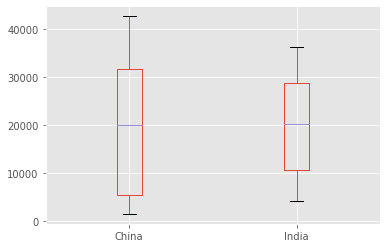

In [ ]:
### nhập đáp án của bạn tạo đây
df_CI.plot(kind = 'box')

<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    df_CI.plot(kind='box', figsize=(10, 7))

    plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
    plt.ylabel('Number of Immigrants')

    plt.show()

```

</details>


Chúng ta có thể thấy rằng, trong khi cả hai quốc gia đều có cùng dân số nhập cư trung bình (~ 20.000 người), thì phạm vi dân số nhập cư của Trung Quốc lại trải rộng hơn so với Ấn Độ. Dân số nhập cư tối đa của Ấn Độ trong bất kỳ năm nào (36.210) cũng thấp hơn khoảng 15% so với dân số tối đa của Trung Quốc (42.584).


Nếu bạn muốn tạo các biểu đồ hộp ngang, có thể chuyển tham số `vert` vào hàm **plot** và gán nó cho _False_. Bạn cũng có thể chỉ định một màu khác trong trường hợp bạn không thích màu đỏ mặc định.


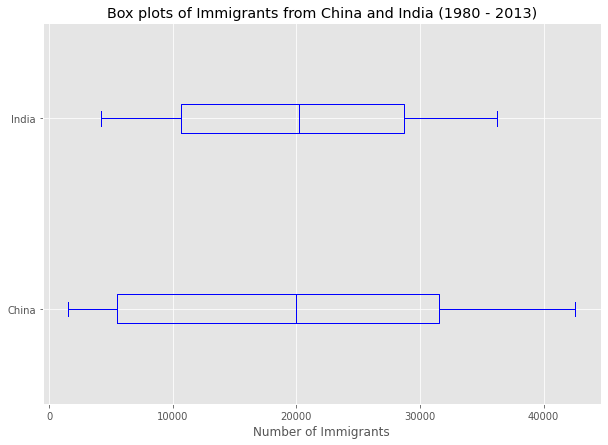

In [ ]:
# biểu đồ hộp ngang
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

Đôi khi chúng ta muốn vẽ nhiều biểu đồ trong cùng một hình. Ví dụ: chúng ta muốn thực hiện so sánh song song giữa biểu đồ hộp với biểu đồ đường biểu thị sự nhập cư của Trung Quốc và Ấn Độ.

Để hiển thị nhiều biểu đồ với nhau, chúng ta có thể tạo một **`figure`** (canvas tổng thể) và chia nó thành **`subplots`**, mỗi subplot chứa một biểu đồ. Với **subplots**, chúng ta thường làm việc với **lớp artist** thay vì **lớp scripting**.

Cú pháp thông thường là: <br>

```python
    fig = plt.figure() # tạo figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # tạo subplots
```

trong đó:

*   `nrows` và `ncols` được sử dụng để chia nhơ hình thành (`nrows` \* `ncols`) các trục con,
*   `plot_number` được dùng để xác định các subplot cụ thể mà hàm này tạo ra trong lưới giả định. `plot_number` bắt đầu từ 1, tăng dần trên các hàng và có tối đa `nrows` \* `ncols` như hiển thị bên dưới.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width=500 align="center">


Sau đó, chúng ta có thể chỉ định subplot nào để đặt từng biểu đồ bằng cách truyền vào tham số `ax` trong phương thức `plot()` như sau:


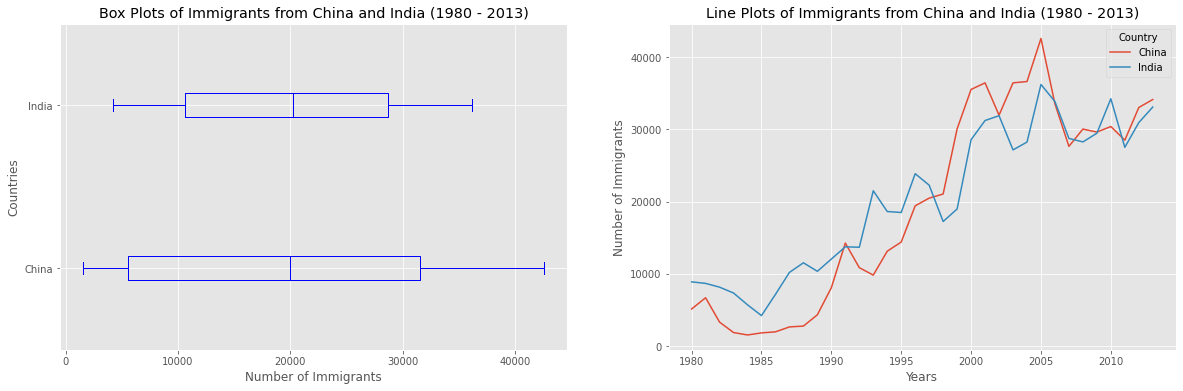

In [ ]:
fig = plt.figure() # tạo figure

ax0 = fig.add_subplot(1, 2, 1) # thêm subplot 1 (1 hàng, 2 cột, biểu đồ đầu tiên)
ax1 = fig.add_subplot(1, 2, 2) # thêm subplot 2 (1 hàng, 2 cột, biểu đồ thứ hai). Xem gợi ý dưới đây**

# Subplot 1: Biểu đồ hộp
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # thêm vào subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Biểu đồ đường
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # thêm vào subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

*** Gợi ý liên quan đến quy ước subplot**

Trong trường hợp khi `nrows`,` ncols` và `plot_number` đều nhỏ hơn 10, thì có thể thay thế bằng số có 3 chữ số, trong đó hàng trăm biểu diễn `nrows`, hàng chục biểu diễn `ncols ` và hàng đơn vị biểu diễn `plot_number`. Ví dụ,

```python
   subplot(211) == subplot(2, 1, 1) 
```

tạo ra một trục con trong một hình đại diện cho biểu đồ trên cùng (tức là biểu đồ đầu tiên) trong một lưới giả định 2 hàng x 1 cột (thực tế không có lưới nào tồn tại, nhưng về mặt khái niệm thì đây là cách subplot trả về đã được sắp xếp).


Hãy thử thứ nâng cao hơn một chút.

Trước đây, chúng ta đã xác định top 15 quốc gia dựa trên tổng số người nhập cư từ năm 1980-2013.

**Câu hỏi:** Tạo biểu đồ hộp để hình dung sự phân bố của top 15 quốc gia (dựa trên tổng số người nhập cư) được nhóm theo _thập kỷ_ `1980`,` 1990` và `2000`.


Bước 1: Lấy tập dữ liệu. Nhận top 15 quốc gia dựa trên Tổng số dân nhập cư. Đặt tên cho dataframe là **df_top15**.


In [ ]:
### nhập đáp án của bạn tạo đây
df_can.sort_values(by = 'Total',axis = 0,inplace=True,ascending = False)
df_top15 = df_can[:16]

<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
    df_top15

```

</details>


Bước 2: Tạo dataframe mới chứa tổng hợp cho từng thập kỷ. Một cách để thực hiện là:

1. Tạo danh sách tất cả các năm trong các thập kỷ 80, 90 và 00.
2. Cắt dataframe df_can ban đầu để tạo một chuỗi (series) cho mỗi thập kỷ và tổng hợp tất cả các năm cho mỗi quốc gia.
3. Hợp nhất ba chuỗi thành một dataframe mới. Gọi dataframe là **new_df**.


In [ ]:
### nhập đáp án của bạn tạo đây
df_80 = list(map(str,range(1980,1990)))
df_90 = list(map(str,range(1990,2000)))
df_00 = list(map(str,range(2000,2010)))
df_80s = df_top15.loc[:,df_80].sum(axis = 1)
df_90s = df_top15.loc[:,df_90].sum(axis = 1)
df_00s = df_top15.loc[:,df_00].sum(axis = 1)
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183



<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:
    
    # tạo danh sách tất cả các năm trong các thập kỷ 80, 90 và 00.
    years_80s = list(map(str, range(1980, 1990))) 
    years_90s = list(map(str, range(1990, 2000))) 
    years_00s = list(map(str, range(2000, 2010))) 

    # Cắt dataframe df_can ban đầu để tạo một chuỗi cho mỗi thập kỷ
    df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
    df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
    df_00s = df_top15.loc[:, years_00s].sum(axis=1)

    # hợp nhất ba chuỗi thành một dataframe mới
    new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

    # trình bày dataframe
    new_df.head()


```

</details>


Hãy tìm hiểu thêm về các thống kê được liên kết với dataframe bằng phương thức `description()`.


In [ ]:
### nhập đáp án của bạn tạo đây
new_df.describe()

,1980s,1990s,2000s
count,16.000000,16.000000,16.00000
mean,43051.312500,81601.875000,92585.18750
std,43041.004811,67830.807783,99118.80538
min,7613.000000,21710.000000,13629.00000
25%,16917.500000,38073.250000,28862.75000
50%,27778.000000,55893.000000,57736.00000
75%,58392.500000,87436.250000,94459.25000
max,179171.000000,261966.000000,340385.00000


<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:    
    new_df.describe()
```

</details>


Bước 3: Vẽ biểu đồ hộp


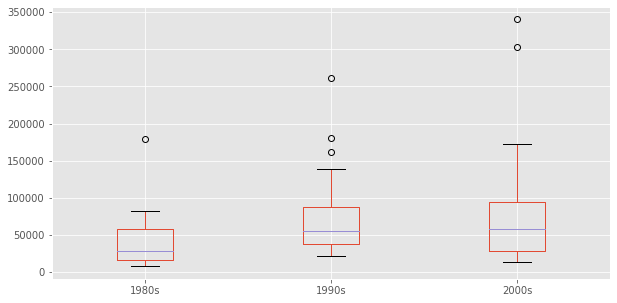

In [ ]:
### nhập đáp án của bạn tạo đây
new_df.plot(kind = 'box',figsize = (10,5))

<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:    
    new_df.plot(kind='box', figsize=(10, 6))

    plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

    plt.show()

```

</details>


Lưu ý rằng biểu đồ hộp khác với bảng tóm tắt đã tạo. Biểu đồ hộp quét dữ liệu và xác định các giá trị ngoại lệ (outlier). Để trở thành ngoại lệ, giá trị dữ liệu phải: <br>

- lớn hơn Q3 ít nhất 1,5 lần IQR, hoặc,
- nhỏ hơn Q1 ít nhất 1,5 lần IQR.

Hãy lấy thập niên 2000 làm ví dụ: <br>

- Q1 (25%) = 36.101,5 <br>
- Quý 3 (75%) = 105.505,5 <br>
- IQR = Q3 - Q1 = 69.404 <br>

Sử dụng định nghĩa của giá trị ngoại lệ, bất kỳ giá trị nào lớn hơn Q3 1,5 lần IQR sẽ được gắn cờ là giá trị ngoại lệ.

Outlier > 105.505,5 + (1,5 * 69,404) <br>
Outlier > 209.611,5


In [ ]:
# hãy kiểm tra xem có bao nhiêu mục nhập vượt quá ngưỡng ngoại lệ
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:    
    new_df=new_df.reset_index()
    new_df[new_df['2000s']> 209611.5]

```

</details>


<!-- The correct answer is:
new_df[new_df['2000s']> 209611.5]
-->


Cả Trung Quốc và Ấn Độ đều được coi là ngoại lệ vì dân số của họ trong thập kỷ vượt quá 209.611,5.

Biểu đồ hộp là một công cụ trực quan hóa nâng cao có nhiều tùy chọn và tùy chỉnh vượt qua phạm vi của lab này. Vui lòng tham khảo [tài liệu Matplotlib](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) về biểu đồ hộp để biết thêm thông tin.


# Biểu đồ phân tán <a id="10"></a>

`Biểu đồ phân tán` (2D) là một phương pháp hữu ích để so sánh các biến với nhau. Biểu đồ `phân tán` trông giống như `biểu đồ đường` ở chỗ chúng đều ánh xạ các biến độc lập và phụ thuộc trên biểu đồ 2D. Trong khi ở biểu đồ đường, các điểm dữ liệu được kết nối với nhau bằng một đường thì ở biểu đồ phân tán, chúng không được kết nối. Dữ liệu trong biểu đồ phân tán được coi là biểu diễn một xu hướng. Nhờ phân tích sâu hơn với các công cụ như hồi quy, chúng ta có thể tính toán mối liên hệ này và sử dụng nó để dự đoán các xu hướng ngoài tập dữ liệu.

Hãy bắt đầu bằng việc khám phá những điều sau:

Sử dụng `biểu đồ phân tán`, hãy hình dung xu hướng tổng số người nhập cư đến Canada (tất cả các quốc gia cộng lại) trong những năm 1980-2013.


Bước 1: Lấy tập dữ liệu. Vì chúng ta đang kỳ vọng sử dụng mối liên hệ giữa `years` và `total population`, hãy chuyển `years` thành kiểu `int`.


In [ ]:
# sử dụng phương thức sum() để lấy tổng dân số mỗi năm
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# đổi years thành kiểu int (hữu ích cho hổi quy sau này)
df_tot.index = map(int, df_tot.index)

# đặt lại chỉ mục để đưa trở lại dưới dạng một cột trong dataframe df_tot
df_tot.reset_index(inplace = True)

# đặt lại tên các cột
df_tot.columns = ['year', 'total']

#xem 5 dòng đầu tiên của dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Bước 2: Vẽ biểu đồ dữ liệu. Trong `Matplotlib`, chúng ta có thể tạo một tập hợp biểu đồ `phân tán` bằng cách truyền vào `kind='scatter'` làm đối số biểu đồ. Chúng ta cũng sẽ cần truyền các từ khóa `x` và `y` để chỉ định các cột trên trục x và y.


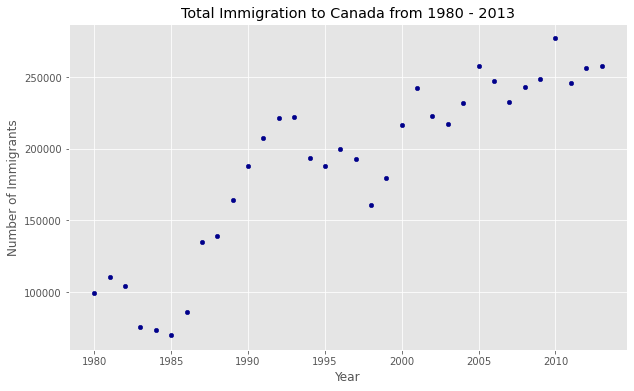

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Hãy lưu ý cách biểu đồ phân tán không kết nối các điểm dữ liệu với nhau. Chúng ta có thể quan sát rõ ràng xu hướng tăng lên trong dữ liệu: tổng số người nhập cư tăng lên theo năm. Chúng ta có thể phân tích theo toán học xu hướng tăng này bằng đường hồi quy (đường phù hợp nhất).

Vậy, hãy cố gắng vẽ một đường tuyến tính phù hợp nhất và sử dụng nó để dự đoán số lượng người nhập cư vào năm 2015.

Bước 1: Nhận phương trình của đường phù hợp nhất. Chúng ta sẽ sử dụng phương thức `polyfit()` của **Numpy** bằng cách truyền vào như sau:

- `x`: tọa độ x của dữ liệu.
- `y`: tọa độ y của dữ liệu.
- `deg`: Mức độ phù hợp của đa thức. 1 = tuyến tính, 2 = bậc hai,...


In [ ]:
x = df_tot['year']      # year trên trục x
y = df_tot['total']     # total trên trục y
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

Kết quả được một mảng có hệ số đa thức, lũy thừa cao nhất. Vì chúng ta đang vẽ biểu đồ hồi quy tuyến tính `y = a*x + b`, đầu ra có 2 phần tử `[5.56709228e + 03, -1.09261952e + 07]` với độ dốc ở 0 và giao nhau ở 1.

Bước 2: Vẽ đường hồi quy trên `biểu đồ phân tán`.


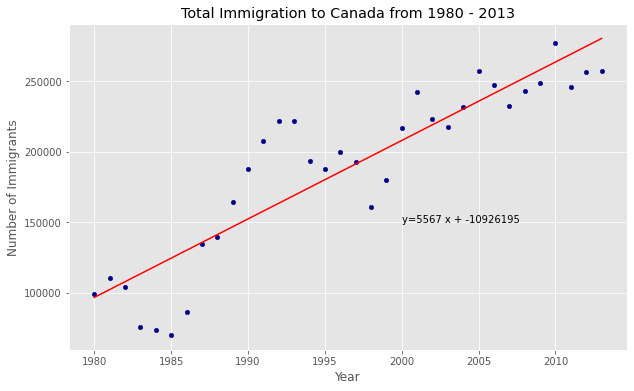

'No. Immigrants = 5567 * Year + -10926195'

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# đường biểu đồ phù hợp nhất
plt.plot(x, fit[0] * x + fit[1], color='red') # nhắc lại x là Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# in ra đường phù hợp nhất
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Nhờ phương trình của đường phù hợp nhất, chúng ta có thể ước tính số lượng người nhập cư vào năm 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

Khi so sánh với các số liệu thực tế từ Bộ Quốc tịch và Nhập cư Canada (CIC) [Báo cáo thường niên năm 2016](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), chúng ta thấy rằng Canada đã nhận 271.845 người nhập cư vào năm 2015. Giá trị ước tính của chúng ta là 291.310 người nằm trong khoảng 7% so với con số thực tế, khá tốt khi xem xét dữ liệu ban đầu từ Liên hợp quốc (và có thể khác một chút so với dữ liệu CIC).

Lưu ý thêm, chúng ta có thể quan sát thấy lượng nhập cư đã giảm trong những năm 1993 - 1997. Phân tích sâu hơn về chủ đề này cho thấy rằng vào năm 1993, Canada đã giới thiệu kỹ về Dự luật C-86, đã đưa ra các sửa đổi đối với hệ thống xác định người tị nạn, phần lớn là hạn chế. Những sửa đổi bổ sung đối với Quy định Nhập cư đã hủy bỏ quyền bảo trợ cần thiết cho "những người thân được trợ giúp" và giảm số điểm được trao cho họ, khiến các thành viên gia đình (ngoài gia đình cơ bản) khó nhập cư hơn vào Canada. Các biện pháp hạn chế này đã có tác động trực tiếp đến số lượng nhập cư trong vài năm tới.

**Câu hỏi**: Tạo biểu đồ phân tán về tổng số người nhập cư từ Đan Mạch, Na Uy và Thụy Điển đến Canada từ năm 1980 đến năm 2013.


Bước 1: Thu thập dữ liệu:

1. Tạo dataframe chỉ gồm các số liệu liên quan đến Đan Mạch, Na Uy và Thụy Điển. Đặt tên cho dataframe này là **df_countries**.
2. Tính tổng số người nhập cư trên cả 3 quốc gia mỗi năm và chuyển kết quả thành dataframe. Đặt tên cho dataframe mới này là **df_total**.
3. Đặt lại chỉ mục tại chỗ.
4. Đổi tên các cột thành **year** và **total**.
5. Hiển thị kết quả dataframe.


In [37]:
### nhập đáp án của bạn tạo đây
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis = 1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head(3)

,year,total
0,1980,669
1,1981,678
2,1982,627


<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:  
    
    # tạo dataframe df_countries 
    df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # tạo dataframe df_total bằng cách tính tổng của 3 quốc gia cho mỗi năm 
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # đặt lại chỉ mục
    df_total.reset_index(inplace=True)

    # đổi tên các cột
    df_total.columns = ['year', 'total']

    # đổi cột year từ kiểu string thành int để tạo biểu đồ phân tán
    df_total['year'] = df_total['year'].astype(int)

    # hiển thị kết quả dataframe
    df_total.head()


```

</details>


Bước 2: Tạo biểu đồ phân tán bằng cách vẽ biểu đồ tổng so với năm trong **df_total**.


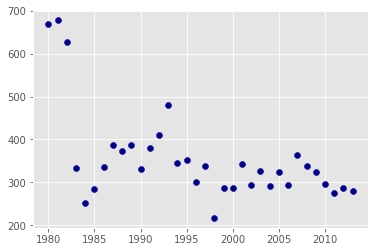

In [40]:
### nhập đáp án của bạn tạo đây
plt.scatter(x = df_total['year'],y = df_total['total'], color='darkblue')

<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:  
    
    # tạo biểu đồ phân tán
    df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

    # thêm tiêu đề và nhãn vào các trục 
    plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
    plt.xlabel('Year')
    plt.ylabel('Number of Immigrants')

    # hiển thị biểu đồ
    plt.show()


```

</details>


# Biểu đồ bong bóng <a id="12"></a>

`Biểu đồ bong bóng` là một biến thể của` biểu đồ phân tán`, hiển thị 3 chiều của dữ liệu (x, y, z). Các điểm dữ liệu được thay thế bằng bong bóng và kích thước của bong bóng được xác định bởi biến thứ ba `z`, hay còn được gọi là trọng số. Trong `maplotlib`, chúng ta có thể chuyển  từ khóa `s` thành `plot()`, chứa trọng số của mỗi điểm trong một mảng hoặc vô hướng.

**Hãy bắt đầu bằng cách phân tích ảnh hưởng của đại suy thoái ở Argentina**.

Argentina đã trải qua một cuộc khủng hoảng nghiêm trọng từ năm 1998 - 2002, gây ra tình trạng thất nghiệp, bạo loạn, sự sụp đổ của chính phủ và vỡ nợ nước ngoài. Về thu nhập, hơn 50% người dân Argentina là người nghèo, và cứ 10 trẻ em thì có 7 trẻ em nghèo trong cuộc khủng hoảng năm 2002.

Hãy phân tích tác động của cuộc khủng hoảng này và so sánh việc nhập cư của Argentina với người láng giềng Brazil. Hãy thực hiện bằng cách sử dụng `biểu đồ bong bóng` về lượng người nhập cư từ Brazil và Argentina trong những năm 1980 - 2013. Chúng ta sẽ đặt trọng số cho bong bóng là giá trị _chuẩn hóa_ của dân số mỗi năm.

Bước 1: Lấy dữ liệu cho Brazil và Argentina. Giống như ví dụ trước, chúng ta sẽ chuyển đổi `Years` thành kiểu int và đưa nó vào dataframe.


In [41]:
df_can_t = df_can[years].transpose() # chuyển vị dataframe

# ép kiểu Years (chỉ mục) thành kiểu int
df_can_t.index = map(int, df_can_t.index)

# hãy gắn nhãn chỉ mục. Nó sẽ tự động là tên cột khi đặt lại chỉ mục
df_can_t.index.name = 'Year'

# đặt lại chỉ mục để Year là cột
df_can_t.reset_index(inplace=True)

# quan sát các thay đổi
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania,Haiti,Guyana,Portugal,Egypt,Morocco,Colombia,Iraq,Algeria,Israel,Bangladesh,Germany,Russian Federation,Mexico,Afghanistan,El Salvador,Ukraine,Trinidad and Tobago,Somalia,South Africa,Nigeria,Jordan,Ethiopia,Peru,Turkey,...,Central African Republic,Slovenia,Tajikistan,Bahrain,Botswana,Democratic People's Republic of Korea,Namibia,Turkmenistan,Malawi,"China, Macao Special Administrative Region",Oman,Luxembourg,Cabo Verde,Comoros,Swaziland,Mozambique,Qatar,Tonga,Lesotho,Montenegro,Guinea-Bissau,Samoa,Papua New Guinea,Equatorial Guinea,Liechtenstein,Maldives,Monaco,Canada,Nauru,Andorra,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,1409,1729,3198,1191,375,1666,2334,4473,612,325,266,262,80,1403,83,1626,0,409,16,110,0,958,7,1026,81,177,98,317,481,...,4,0,0,0,10,1,0,0,5,0,0,14,1,0,4,0,0,2,1,0,0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,1119,2027,2634,1829,438,3692,2943,3486,660,471,326,245,67,1711,84,1977,0,394,39,295,0,947,10,1118,60,160,59,456,874,...,3,0,0,2,1,1,5,0,4,0,0,4,1,2,1,0,0,4,1,0,0,7,2,0,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,1159,2219,2661,2162,583,3498,3575,2432,755,447,360,260,71,1334,86,3062,0,491,39,882,0,972,7,781,58,155,54,401,706,...,1,0,0,1,3,3,5,0,6,0,0,2,2,2,1,7,0,7,1,0,0,4,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,789,1490,2455,3404,543,2860,2650,1433,455,335,244,380,69,541,81,2376,0,490,47,2587,0,766,12,379,58,113,98,241,280,...,0,0,0,1,3,1,3,0,3,0,8,5,0,0,0,2,0,1,2,0,0,1,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,1253,1169,2508,7583,524,1418,1932,1398,447,248,235,428,63,446,98,1610,0,509,71,2666,0,606,14,271,78,102,154,306,338,...,0,0,0,1,7,4,2,0,2,0,0,1,11,0,10,3,0,2,7,0,1,3,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Bước 2: Tạo trọng số chuẩn hóa.

Trong thống kê có một số phương pháp chuẩn hóa, mỗi phương pháp có cách sử dụng riêng. Trong trường hợp này, chúng ta sẽ sử dụng [tính năng mở rộng quy mô](https://en.wikipedia.org/wiki/Feature_scaling?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) để đưa tất cả các giá trị vào phạm vi [0,1]. Công thức chung là:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

trong đó: _`X`_ là giá trị ban đầu, _`X'`_ là giá trị chuẩn hóa. Công thức đặt giá trị tối đa trong tập dữ liệu là 1 và giá trị nhỏ nhất là 0. Phần còn lại của tập dữ liệu được chia tỷ lệ thành giá trị từ 0-1 cho phù hợp.


In [42]:
# chuẩn hóa dữ liệu Brazil 
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# chuẩn hóa dữ liệu Argentina 
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Bước 3: Vẽ biểu đồ dữ liệu.

- Để vẽ hai biểu đồ phân tán khác nhau trong một biểu đồ, chúng ta có thể gộp các trục của biểu đồ này vào biểu đồ kia bằng cách chuyển nó qua tham số `ax`.
- Chúng ta cũng sẽ truyền trọng số bằng tham số `s`. Biết rằng các trọng số chuẩn hóa nằm trong khoảng từ 0-1, chúng sẽ không hiển thị trên biểu đồ. Do đó chúng ta sẽ:
     - nhân trọng số với 2000 để tăng tỷ lệ trên biểu đồ và,
     - thêm 10 để bù cho giá trị min (có trọng số 0 và do đó chia tỷ lệ với x2000).

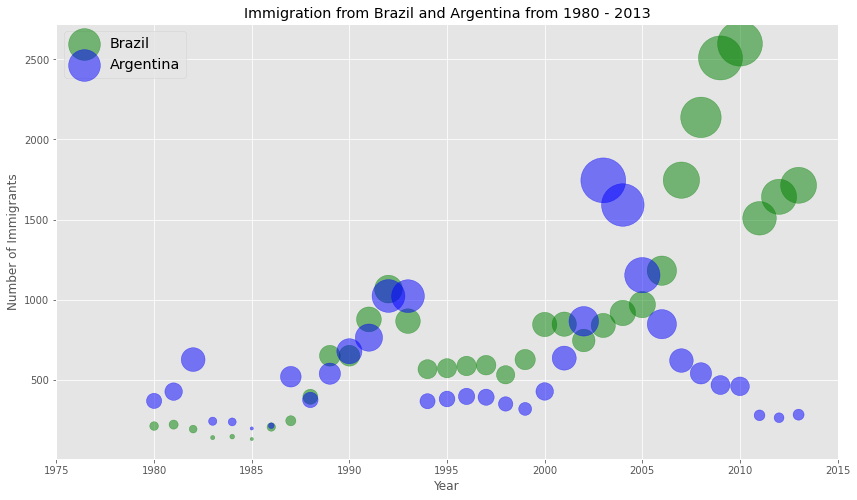

In [43]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # truyền các trọng số 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Kích thước của bong bóng tương ứng với mức độ dân số nhập cư trong năm đó, so với dữ liệu 1980-2013. Bong bóng càng lớn thì số lượng người nhập cư trong năm đó càng nhiều.

Từ biểu đồ trên, chúng ta có thể thấy lượng nhập cư từ Argentina gia tăng tương ứng trong cuộc đại suy thoái 1998 - 2002. Chúng ta cũng có thể quan sát thấy một đợt tăng đột biến tương tự vào khoảng năm 1985 đến 1993. Trên thực tế, Argentina đã phải trải qua một cuộc đại suy thoái từ 1974-1990, ngay trước khi bắt đầu cuộc đại suy thoái 1998-2002.

Cũng vậy, Brazil đã phải hứng chịu _Hiệu ứng Samba_ khi đồng real Brazil (tiền tệ) giảm gần 35% vào năm 1999. Người ta lo ngại về một cuộc khủng hoảng tài chính Nam Mỹ vì nhiều nước Nam Mỹ phụ thuộc khá nhiều vào xuất khẩu công nghiệp từ Brazil. Sau đó chính phủ Brazil đã thông qua một chương trình thắt lưng buộc bụng và nền kinh tế dần phục hồi trong những năm qua, đỉnh điểm là sự tăng vọt vào năm 2010. Dữ liệu nhập cư phản ánh những sự kiện này.


**Câu hỏi**: Vừa rồi trong lab này, chúng ta đã tạo các biểu đồ hộp để so sánh lượng nhập cư từ Trung Quốc và Ấn Độ đến Canada. Tạo biểu đồ bong bóng về nhập cư từ Trung Quốc và Ấn Độ để hình dung các khác biệt theo thời gian từ năm 1980 đến năm 2013. Bạn có thể sử dụng **df_can_t** đã xác định và sử dụng trong ví dụ trước.


Bước 1: Chuẩn hóa dữ liệu liên quan đến Trung Quốc và Ấn Độ.


In [ ]:
### nhập đáp án của bạn tại đây
normal_china = df_can_t["China"] / max(df_can_t['China'])
normal_india = df_can_t['India'] / max(df_can_t['India'])
normal_china

<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:  
    
    # chuẩn hóa dữ liệu China 
    norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
    # chuẩn hóa dữ liệu India 
    norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


```

</details>


Bước 2: Tạo biểu đồ bong bóng.


In [ ]:
### nhập đáp án của bạn tại đây
fig = plt.figure() # tạo figure

ax0 = fig.add_subplot(1, 2, 1) # thêm subplot 1 (1 hàng, 2 cột, biểu đồ đầu tiên)
ax1 = fig.add_subplot(1, 2, 2)

ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=normal_china * 2000 + 10,  # truyền các trọng số
                        xlim=(1975, 2015)
                       )
ax1 = df_can_t.plot(kind = 'scatter',x = 'Year',y = 'India',figsize = (14,8),alpha = 0.5,color = 'blue',s = normal_india * 2000 + 10,xlim = (1975,2015))

<details><summary>Click vào đây để xem lời giải mẫu trong python</summary>

```python
    #The correct answer is:  
    
    # China
    ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # truyền các trọng số
                        xlim=(1975, 2015)
                       )

    # India
    ax1 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

    ax0.set_ylabel('Number of Immigrants')
    ax0.set_title('Immigration from China and India from 1980 - 2013')
    ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')


```

</details>
